## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#mouse_metadata.columns
#study_results.columns
# Combine the data into a single dataset
pyma_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")

pyma_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group = pyma_data.groupby("Drug Regimen")
#regimen_group.head()
#summary elements
#chain to turn into dataframe
#round values to 2 decimals
regimen_mean = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].mean())
regimen_mean = round(regimen_mean.rename(columns ={"Tumor Volume (mm3)":"Mean"}),2)

regimen_median = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].median())
regimen_median = round(regimen_median.rename(columns={"Tumor Volume (mm3)":"Median"}),2)


regimen_var = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].var())
regimen_var = round(regimen_var.rename(columns={"Tumor Volume (mm3)":"Variance"}),2)

regimen_std = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].std())
regimen_std = round(regimen_std.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"}),2)

regimen_sem = pd.DataFrame(regimen_group["Tumor Volume (mm3)"].sem())
regimen_sem = round(regimen_sem.rename(columns={"Tumor Volume (mm3)":"SEM"}),2)
                    


#Turn into dataframe
#regimen_mean_df = pd.DataFrame(regimen_mean)
#regimen_median_df = pd.DataFrame(regimen_median)

regimen_summary = pd.merge(regimen_mean,regimen_median,on="Drug Regimen")
regimen_summary2 = pd.merge(regimen_summary,regimen_var,on="Drug Regimen")
regimen_summary3 = pd.merge(regimen_summary2,regimen_std, on="Drug Regimen")
regimen_summary4 = pd.merge(regimen_summary3, regimen_sem, on="Drug Regimen")
regimen_summary4

regimen_summary4


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

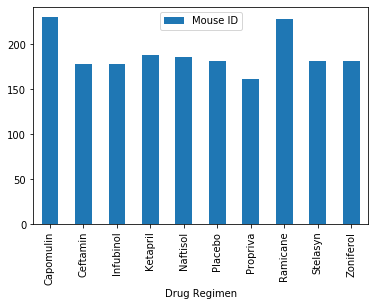

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#Datapoints based on # of mouse trials per regimen

mouseid_df = pd.DataFrame(regimen_group["Mouse ID"].count())

mouseid_df
mouseid_df.plot.bar()


([<matplotlib.axis.XTick at 0x26a82993948>,
 <a list of 10 Text xticklabel objects>)

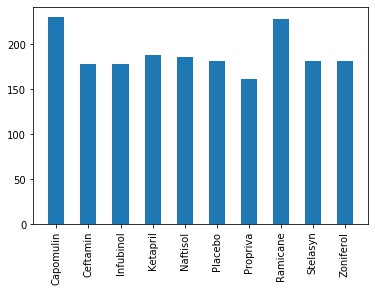

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#plt.plot()

x_values = mouseid_df.index.values
y_values = mouseid_df["Mouse ID"]

labels = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"]

plt.bar(x_values,y_values, width =0.5)
plt.xticks(x_values, labels, rotation ="vertical")

## Pie plots

Male      125
Female    124
Name: Sex, dtype: int64


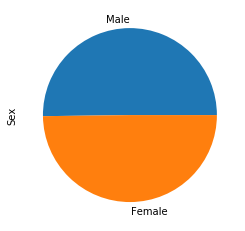

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = pyma_data[["Mouse ID","Sex"]]
#remove duplicate trials
mouse_gender = mouse_gender.drop_duplicates(subset ="Mouse ID", keep = "first") 
#based on excel, should be about 249 different mouse id
#separate male and female gender
mouse_gender = mouse_gender["Sex"].value_counts()
print(mouse_gender)


type(mouse_gender)

mouse_gender.plot.pie()
#print(pandas_pie_plt)





Text(0.0, 1.0, 'Sex')

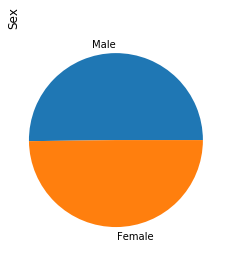

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender_label = ["Male", "Female"]
plt.pie(mouse_gender, labels = gender_label)
plt.title("Sex", loc = "left", rotation = "vertical")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen